In [78]:
%load_ext autoreload
%autoreload 2
import RNA
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from random import choices, seed

from utils import *
from penalties import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
seq_db_pairs = parse_dp_file('RNAstrand/RNAstrand_noMS_noPK.dp')

In [110]:
# Get sequences under 150 nt
small_seqs = []
for k, v in seq_db_pairs.items():
    if len(v['seq']) < 151:
        small_seqs.append(k)

# Get 100 random short structures 
seed(1337)
sample = choices(small_seqs, k=100)
for s in sample:
    print(s, len(seq_db_pairs[s]['seq']))



SPR_00223 85
SPR_00099 77
RFA_00653 66
SPR_00178 76
PDB_00191 15
SPR_00518 77
RFA_00678 44
SPR_00468 77
SRP_00101 85
RFA_00399 54
SRP_00367 117
PDB_00430 81
SPR_00279 77
SRP_00072 113
PDB_00026 17
SPR_00513 77
RFA_00698 116
CRW_01578 120
SPR_00343 75
RFA_00585 99
RFA_00705 46
SPR_00485 77
SPR_00483 76
SPR_00292 78
SPR_00529 75
SPR_00189 70
RFA_00797 101
SRP_00235 101
SPR_00477 77
RFA_00407 54
SPR_00331 75
SRP_00081 106
RFA_00792 101
PDB_01072 28
PDB_00402 75
CRW_01580 120
SPR_00084 76
SPR_00224 87
SPR_00165 77
CRW_01541 120
RFA_00710 45
SPR_00274 77
SPR_00226 86
SPR_00310 76
SPR_00249 85
PDB_00374 73
PDB_01168 20
RFA_00785 101
SRP_00083 99
SPR_00480 76
RFA_00408 54
SPR_00476 75
SPR_00213 88
RFA_00744 43
SPR_00469 76
SPR_00124 72
SPR_00449 78
SPR_00133 75
SPR_00263 85
SPR_00555 77
PDB_00565 128
SRP_00310 77
SPR_00090 76
SPR_00089 76
SPR_00448 78
CRW_01552 120
SPR_00040 75
SPR_00394 86
RFA_00789 101
SRP_00001 117
SPR_00490 77
SPR_00031 71
SPR_00416 85
SPR_00384 92
RFA_00591 100
SPR_00137

In [111]:
# See where the best structures happen
#percents = np.arange(0.00, 1.05, 0.05)
percents = np.arange(0.00, 0.4, 0.025)
md = RNA.md()
md.temperature = 37
samples = {}
for k in sample:
    seq = seq_db_pairs[k]['seq']
    ref = seq_db_pairs[k]['db']
    print("Working on", k, "len =", len(seq))

    samples[k] = {}

    for p in percents:
        #print("Working on percentage = {:.3f}".format(p))
        samples[k][p] = {}
        last_structure = ''
        for length in range(10, len(seq)):
            subseq = seq[:length+1]

            samples[k][p][length+1] = sequence_dependent_penalty(subseq, p, last_structure, md)[0]
            last_structure = samples[k][p][length+1]




Working on SPR_00223 len = 85
Working on SPR_00099 len = 77
Working on RFA_00653 len = 66
Working on SPR_00178 len = 76
Working on PDB_00191 len = 15
Working on SPR_00518 len = 77
Working on RFA_00678 len = 44
Working on SPR_00468 len = 77
Working on SRP_00101 len = 85
Working on RFA_00399 len = 54
Working on SRP_00367 len = 117
Working on PDB_00430 len = 81
Working on SPR_00279 len = 77
Working on SRP_00072 len = 113
Working on PDB_00026 len = 17
Working on SPR_00513 len = 77
Working on RFA_00698 len = 116
Working on CRW_01578 len = 120
Working on SPR_00343 len = 75
Working on RFA_00585 len = 99
Working on RFA_00705 len = 46
Working on SPR_00485 len = 77
Working on SPR_00483 len = 76
Working on SPR_00292 len = 78
Working on SPR_00529 len = 75
Working on SPR_00189 len = 70
Working on RFA_00797 len = 101
Working on SRP_00235 len = 101
Working on SPR_00477 len = 77
Working on RFA_00407 len = 54
Working on SPR_00331 len = 75
Working on SRP_00081 len = 106
Working on RFA_00792 len = 101
Wo

In [125]:
x = []
y = []
ymin = []
ymax = []
c = []
for k in samples.keys():
    length = len(seq_db_pairs[k]['seq'])
    best_score = -1
    best_percent = 0
    mccs = []
    #print(k)
    for p in percents:
        mcc = calc_MCC(samples[k][p][length], seq_db_pairs[k]['db'])
        mccs.append(mcc)
        #print(f"{p:.3f}", f"{mcc:.3f}")
        if mcc >= best_score:
            best_score = mcc
            best_percent = p

    # For most of these, the best structure happened over a range
    mccs = np.array(mccs)
    mask = mccs == best_score
    yrange = percents[mask]
    ymin.append(min(yrange))
    ymax.append(max(yrange))

    x.append(best_score)
    y.append(best_percent)
    c.append(length)

ymax = [m + 0.01 for m in ymax]

/var/folders/17/slptg8t94v771jqd8vv_wn6h0000gp/T/ipykernel_77585/2093932752.py:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize(vmin=0, vmax=max(c))))


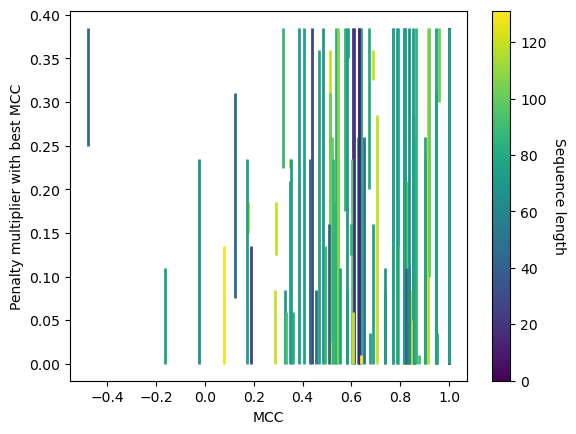

In [161]:
cmap = mpl.colormaps['viridis']
cols = [cmap(l/max(c)) for l in c]
fig, ax = plt.subplots()
#s = ax.scatter(x, y, c=c)
bars = ax.vlines(x, ymin, ymax, colors=cols, linewidths=[2 for _ in x])

ax.set_xlabel('MCC')
ax.set_ylabel('Penalty multiplier with best MCC')
cbar = fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize(vmin=0, vmax=max(c))))
#cbar = ax.figure.colorbar(bars, ax=ax)
cbar.ax.set_ylabel('Sequence length', rotation=-90, va="bottom")

plt.show()

In [163]:
hist = np.zeros_like(percents)
for mi, ma in zip(ymin, ymax):
    mask = np.logical_and(percents >= mi, percents < ma)
    hist += [int(m) for m in mask]
    
hist /= 100

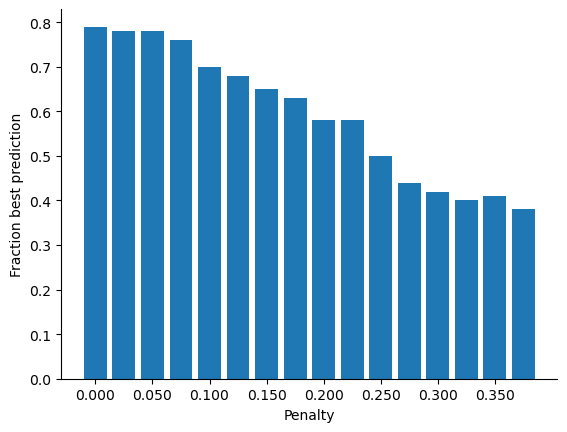

In [159]:
fig, ax = plt.subplots()
ax.bar(np.arange(0, len(percents)), hist)
ax.set_xticks(np.arange(0, len(percents))[::2])
ax.set_xticklabels([f"{p:.3f}" for p in percents[0::2]])
ax.set_xlabel("Penalty")
ax.set_ylabel("Fraction best prediction")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [144]:
percents

array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375])